In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
features = df.columns.drop('target')
features

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [12]:
features = df.columns.drop('target')
X = pd.DataFrame(data=df, columns=features)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
Y = pd.DataFrame(df['target'])
Y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [42]:
tr_acc = []
ts_acc = []

xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.75)

for i in range(1,20):
  kmodel = KNeighborsClassifier(n_neighbors = i)
  kmodel.fit(xtrain,ytrain)

  tr_acc.append(kmodel.score(xtrain,ytrain))
  ts_acc.append(kmodel.score(xtest,ytest))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [43]:
print(tr_acc)
print(ts_acc)

[1.0, 0.788546255506608, 0.7577092511013216, 0.748898678414097, 0.7797356828193832, 0.7533039647577092, 0.73568281938326, 0.7136563876651982, 0.7312775330396476, 0.7224669603524229, 0.7180616740088106, 0.7004405286343612, 0.7092511013215859, 0.7268722466960352, 0.7136563876651982, 0.7048458149779736, 0.6916299559471366, 0.7136563876651982, 0.7004405286343612]
[0.6842105263157895, 0.618421052631579, 0.6578947368421053, 0.6842105263157895, 0.6973684210526315, 0.6578947368421053, 0.7105263157894737, 0.6578947368421053, 0.6447368421052632, 0.631578947368421, 0.6578947368421053, 0.6447368421052632, 0.6447368421052632, 0.631578947368421, 0.631578947368421, 0.6052631578947368, 0.631578947368421, 0.631578947368421, 0.6710526315789473]


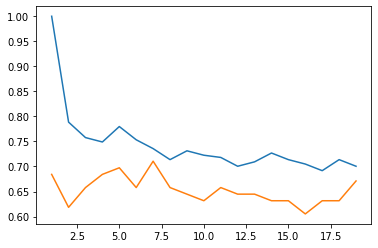

In [45]:
plt.plot(range(1,20) , tr_acc)
plt.plot(range(1,20) , ts_acc)     
plt.show()

# accuracy is best when k = 7

In [50]:
tr_acc[6]

0.73568281938326

In [51]:
ts_acc[6]

0.7105263157894737

In [52]:
kmodel = KNeighborsClassifier(n_neighbors = 7)
kmodel.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [56]:
### TRYING BY REMOVING CERTAIN VARIABLES FOR BETTER ACCURACY
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [60]:
features = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','oldpeak','slope','ca','thal']
X = df[features]
X.head()

,age,sex,cp,trestbps,chol,fbs,thalach,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,150,2.3,0,0,1
1,37,1,2,130,250,0,187,3.5,0,0,2
2,41,0,1,130,204,0,172,1.4,2,0,2
3,56,1,1,120,236,0,178,0.8,2,0,2
4,57,0,0,120,354,0,163,0.6,2,0,2


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

[1.0, 0.8370044052863436, 0.8193832599118943, 0.775330396475771, 0.775330396475771, 0.7577092511013216, 0.7665198237885462, 0.7004405286343612, 0.7400881057268722, 0.7400881057268722, 0.7048458149779736, 0.6828193832599119, 0.7312775330396476, 0.6916299559471366, 0.7004405286343612, 0.7004405286343612, 0.7004405286343612, 0.7180616740088106, 0.7136563876651982]
[0.5263157894736842, 0.5789473684210527, 0.631578947368421, 0.631578947368421, 0.5921052631578947, 0.6052631578947368, 0.6052631578947368, 0.618421052631579, 0.618421052631579, 0.631578947368421, 0.6447368421052632, 0.6447368421052632, 0.6447368421052632, 0.6842105263157895, 0.6578947368421053, 0.6842105263157895, 0.6710526315789473, 0.6578947368421053, 0.6710526315789473]


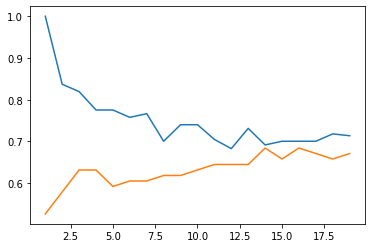

In [61]:
Y = pd.DataFrame(df['target'])
Y.head()

tr_acc = []
ts_acc = []

xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.75)

for i in range(1,20):
  kmodel = KNeighborsClassifier(n_neighbors = i)
  kmodel.fit(xtrain,ytrain)

  tr_acc.append(kmodel.score(xtrain,ytrain))
  ts_acc.append(kmodel.score(xtest,ytest))

print(tr_acc)
print(ts_acc)

plt.plot(range(1,20) , tr_acc)
plt.plot(range(1,20) , ts_acc)     
plt.show()


In [68]:
tr_acc[14]

0.7004405286343612

In [69]:
ts_acc[14]

0.6578947368421053